In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('./data/titanic/train.csv')
test_df = pd.read_csv('./data/titanic/test.csv')
combine = [train_df, test_df]

In [3]:
# 删除无关数据
for dataset in combine:
    dataset.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [5]:
# 将名字改成称号 ，容易分组
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    # 提取字符串

pd.crosstab(train_df['Title'], train_df['Sex']) # 交叉表

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [6]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Dona'], 'Rep_woman') # 有声望的女人
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Don', 'Major', 'Sir', 'Jonkheer'],'Rep_man')

    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
6,Rep_woman,1.000000
4,Mrs,0.793651
2,Miss,0.702703
1,Master,0.575000
0,Dr,0.428571
5,Rep_man,0.375000
3,Mr,0.156673
7,Rev,0.000000


In [7]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5,"Rep_man":6, "Rep_woman":7, "Rev":8}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping).fillna(0)
    dataset.drop('Name',axis=1,inplace=True)
    
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [13]:
print(train_df.info())
print('-'*8)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB
None
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 29

In [15]:
train_df[train_df.Embarked.isnull().values==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
61,62,1,1,female,38.0,0,0,80.0,NaN,2
829,830,1,1,female,62.0,0,0,80.0,NaN,3


In [17]:
train_df.Embarked.fillna(train_df.Embarked.mode()[0],inplace=True)

In [18]:
test_df[test_df.Fare.isnull().values==True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,1044,3,male,60.5,0,0,NaN,S,1


In [22]:
print(test_df.query('Pclass==1').Fare.median())
print(test_df.query('Pclass==2').Fare.median())
print(test_df.query('Pclass==3').Fare.median())

60.0
15.75
7.8958


In [37]:
print(test_df.loc[(test_df['Pclass']==3) & (test_df['Sex']=='male'),'Fare'].mean())
print(test_df.loc[(test_df['Pclass']==3) & (test_df['Sex']=='female'),'Fare'].mean())

11.826350344827587
13.735129166666667


In [38]:
test_df.Fare.fillna(test_df.query('Pclass==3').Fare.dropna().median(),inplace=True)

In [40]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
dtype: bool

现在 就年龄还有缺失值

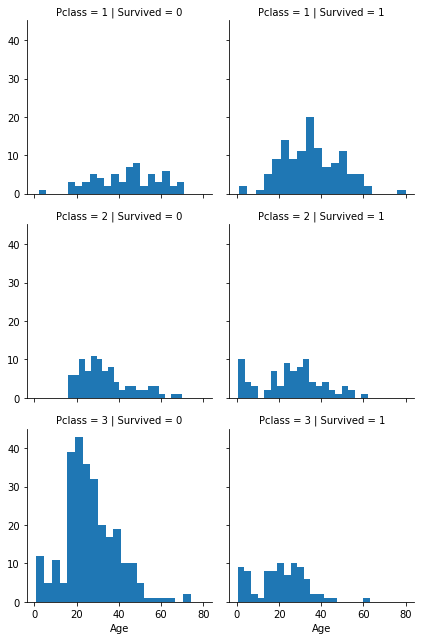

In [45]:
g = sns.FacetGrid(train_df, col='Survived',row='Pclass')
g.map(plt.hist, 'Age', bins=20)

c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


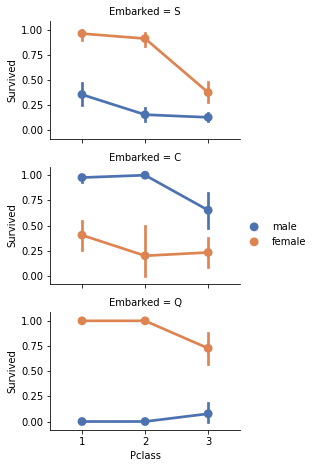

In [47]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked',height=2.2,aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


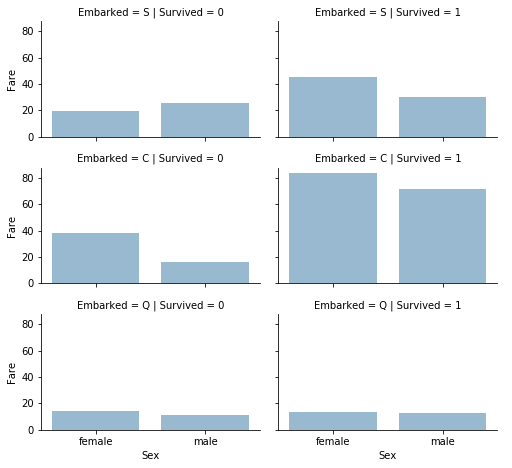

In [48]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [49]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,S,1
1,2,1,1,0,38.0,1,0,71.2833,C,3
2,3,1,3,0,26.0,0,0,7.9250,S,2
3,4,1,1,0,35.0,1,0,53.1000,S,3
4,5,0,3,1,35.0,0,0,8.0500,S,1


In [54]:
# 根据阶层和性别的不同，分别用相应的中位数填充年龄的缺失值
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22,1,0,7.2500,S,1
1,2,1,1,0,38,1,0,71.2833,C,3
2,3,1,3,0,26,0,0,7.9250,S,2
3,4,1,1,0,35,1,0,53.1000,S,3
4,5,0,3,1,35,0,0,8.0500,S,1


In [55]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [57]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 5
    
train_df.drop('AgeBand',axis=1,inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,2,1,0,7.2500,S,1
1,2,1,1,0,3,1,0,71.2833,C,3
2,3,1,3,0,2,0,0,7.9250,S,2
3,4,1,1,0,3,1,0,53.1000,S,3
4,5,0,3,1,3,0,0,8.0500,S,1


In [59]:
combine = [train_df,test_df]

In [63]:
for data in combine:
    data['family_size'] = data['SibSp'] + data['Parch']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,1,2,1,0,7.2500,S,1,1
1,2,1,1,0,3,1,0,71.2833,C,3,1
2,3,1,3,0,2,0,0,7.9250,S,2,0
3,4,1,1,0,3,1,0,53.1000,S,3,1
4,5,0,3,1,3,0,0,8.0500,S,1,0


In [68]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['family_size'] == 0, 'IsAlone'] = 1
    dataset.drop(['SibSp','Parch','family_size'],axis=1,inplace=True)
    
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,2,7.2500,S,1,0
1,2,1,1,0,3,71.2833,C,3,0
2,3,1,3,0,2,7.9250,S,2,1
3,4,1,1,0,3,53.1000,S,3,0
4,5,0,3,1,3,8.0500,S,1,1


In [69]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [70]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [71]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,2,1,S,1,0
1,2,1,1,0,3,4,C,3,0
2,3,1,3,0,2,2,S,2,1
3,4,1,1,0,3,4,S,3,0
4,5,0,3,1,3,2,S,1,1
5,6,0,3,1,2,2,Q,1,1
6,7,0,1,1,4,4,S,1,1
7,8,0,3,1,1,3,S,4,0
8,9,1,3,0,2,2,S,3,0
9,10,1,2,0,1,3,C,3,0


In [72]:
for data in combine:
    data.Embarked = data.Embarked.map({'S':1,'C':2,'Q':3})

In [75]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,3,1,3,1,1
1,893,3,0,3,1,1,3,0
2,894,2,1,4,2,3,1,1
3,895,3,1,2,2,1,1,1
4,896,3,0,2,2,1,3,0


In [76]:
X_train = train_df.drop(["Survived",'PassengerId'], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [77]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.68

In [78]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.28

In [79]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.02

In [90]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.05

In [80]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.66

In [81]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


77.22

In [82]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.79

In [83]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

c:\users\snowz\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


80.36

In [84]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [85]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [101]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [86]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
0,Support Vector Machines,83.28
6,Stochastic Gradient Decent,80.36
1,KNN,80.02
7,Linear SVC,78.79
2,Logistic Regression,78.68
5,Perceptron,77.22
4,Naive Bayes,76.66


In [87]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)

In [98]:
# AdaBoost

ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train, Y_train)
Y_pred = ada_boost.predict(X_test)
ada_boost.score(X_train, Y_train)
acc_ada_boost = round(ada_boost.score(X_train, Y_train) * 100, 2)
acc_ada_boost

81.93

In [104]:
# Gradient Boost

gd_boost = GradientBoostingClassifier(n_estimators=100)
gd_boost.fit(X_train, Y_train)
Y_pred = gd_boost.predict(X_test)
gd_boost.score(X_train, Y_train)
acc_gd_boost = round(gd_boost.score(X_train, Y_train) * 100, 2)
acc_gd_boost

85.3

In [108]:
# AdaBoost

et_boost = ExtraTreesClassifier(n_estimators=100)
et_boost.fit(X_train, Y_train)
Y_pred = et_boost.predict(X_test)
et_boost.score(X_train, Y_train)
acc_et_boost = round(et_boost.score(X_train, Y_train) * 100, 2)
acc_et_boost

86.64

In [112]:
submission = pd.DataFrame({"Survived": Y_pred},index=test_df["PassengerId"])

In [113]:
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [115]:
submission.to_csv('./titanic_submisson.csv')